In [1]:
# Quick hack to put us in the root of the repository/pipeline directory
import os
if os.path.exists("02.data_and_forecasts.ipynb"):
    os.chdir("..")
print("Running in {}".format(os.getcwd()))

Running in /data/hpcdata/users/jambyr/icenet/notebook-test


# IceNet Data and Forecast Products

## Context

### Purpose
The IceNet library provides the ability to download, process, train and predict from end to end via a set of command-line interfaces.

Using this notebook one can understand the various data sources, intermediaries and products that arise from the [CLI demonstrator notebook](01.cli_demonstration.ipynb) activities.

### Modelling approach
This modelling approach allows users to immediately utilise the library for producing sea ice concentraion forecasts.

### Highlights
The key features of an end to end run are: 
* Setup: _this was concerned with setting up the conda environment, which remains the same_
* [Download](#Download): we explore the source data downloaded under the `/data/` folder, reusable across multiple environments
* [Process](#Process): we explore the preprocessing outputs in the `/processed/` folder, which can be fed to models directly or further processed into IceNet datasets
* [Train](#Train): we explore the outputs from the training process and ensemble runs, stored within `/results/networks/`
* [Predict](#Predict): we explore the output from the prediction process and ensemble runs, stored within `/results/predict/`

_This follows the same structure as the CLI demonstration notebook so that it's easy to follow step-by-step..._

### Contributions
#### Notebook
James Byrne (author)

__Please raise issues [in this repository](https://github.com/antarctica/IceNet-Pipeline) to suggest updates to this notebook!__ 

Contact me at _jambyr \<at\> bas.ac.uk_ for anything else...

#### Modelling codebase
James Byrne (code author), Tom Andersson (science author)

#### Modelling publications
Andersson, T.R., Hosking, J.S., Pérez-Ortiz, M. et al. Seasonal Arctic sea ice forecasting with probabilistic deep learning. Nat Commun 12, 5124 (2021). https://doi.org/10.1038/s41467-021-25257-4

#### Involved organisations
The Alan Turing Institute and British Antarctic Survey

## Setup

For the purposes of python analysis we use and provide the following header libraries which are heavily utilised within the IceNet project and the pipeline.

In [2]:
import glob, os, sys
import numpy as np, pandas as pd, xarray as xr

## Download

Downloading data using the icenet_data commands produces a dataset specific input data storage directory called `/data` whose source data can be reused across normalisation (`icenet_process*`) and dataset production (`icenet_dataset*`) runs.

In [3]:
os.listdir("data")

['masks', 'era5', 'osisaf']

The structure of these directories (aside from masks) have consistent layouts:

In [4]:
glob.glob("data/**/2019_12_31.nc", recursive=True)

['data/era5/sh/tas/2019/2019_12_31.nc',
 'data/era5/sh/ta500/2019/2019_12_31.nc',
 'data/era5/sh/tos/2019/2019_12_31.nc',
 'data/era5/sh/psl/2019/2019_12_31.nc',
 'data/era5/sh/zg250/2019/2019_12_31.nc',
 'data/era5/sh/zg500/2019/2019_12_31.nc',
 'data/era5/sh/hus1000/2019/2019_12_31.nc',
 'data/era5/sh/rlds/2019/2019_12_31.nc',
 'data/era5/sh/rsds/2019/2019_12_31.nc',
 'data/era5/sh/uas/2019/2019_12_31.nc',
 'data/era5/sh/vas/2019/2019_12_31.nc',
 'data/osisaf/sh/siconca/2019/2019_12_31.nc']

With masks being the only caveat. However, masks can be interacted with purely through the `Masks` class from `icenet2.data.sic.mask`.

In [5]:
glob.glob("data/masks/**/*.*", recursive=True)

['data/masks/sh/masks/masks.params',
 'data/masks/sh/masks/active_grid_cell_mask_01.npy',
 'data/masks/sh/masks/land_mask.npy',
 'data/masks/sh/masks/active_grid_cell_mask_02.npy',
 'data/masks/sh/masks/active_grid_cell_mask_03.npy',
 'data/masks/sh/masks/active_grid_cell_mask_04.npy',
 'data/masks/sh/masks/active_grid_cell_mask_05.npy',
 'data/masks/sh/masks/active_grid_cell_mask_06.npy',
 'data/masks/sh/masks/active_grid_cell_mask_07.npy',
 'data/masks/sh/masks/active_grid_cell_mask_08.npy',
 'data/masks/sh/masks/active_grid_cell_mask_09.npy',
 'data/masks/sh/masks/active_grid_cell_mask_10.npy',
 'data/masks/sh/masks/active_grid_cell_mask_11.npy',
 'data/masks/sh/masks/active_grid_cell_mask_12.npy',
 'data/masks/sh/siconca/2000/01/ice_conc_sh_ease2-250_cdr-v2p0_200001021200.nc',
 'data/masks/sh/siconca/2000/02/ice_conc_sh_ease2-250_cdr-v2p0_200002021200.nc',
 'data/masks/sh/siconca/2000/03/ice_conc_sh_ease2-250_cdr-v2p0_200003021200.nc',
 'data/masks/sh/siconca/2000/04/ice_conc_sh_ea

Note that the `siconca` variable files are source files for generating the masks that are not actually used after initial mask creation.

### Producing data source videos

One of the easiest ways to inspect source data is to use the `icenet_video_data` command, which will output to `/plot/` in the run directory video(s) corresponding to the selected dataset, hemisphere, variable and year, or all of these items if run with: 

In [6]:
!icenet_video_data era5,osisaf

2022-01-13 16:59:37.444018: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
INFO:root:Looking into data
INFO:root:Looking at data
INFO:root:Looking at data/era5
INFO:root:Looking at data/era5/sh
INFO:root:Looking at data/era5/sh/tas
INFO:root:Looking at data/era5/sh/tas/2019
INFO:root:Looking at data/era5/sh/tas/2020
INFO:root:Looking at data/era5/sh/ta500
INFO:root:Looking at data/era5/sh/ta500/2019
INFO:root:Looking at data/era5/sh/ta500/2020
INFO:root:Looking at data/era5/sh/tos
INFO:root:Looking at data/era5/sh/tos/2019
INFO:root:Looking at data/era5/sh/tos/2020
INFO:root:Looking at data/era5/sh/psl
INFO:root:Looking at data/era5/sh/psl/2019
INFO:root:Looking at data/era5/sh/psl/2020
INFO:root:Looking at data/era5/sh/zg250
INFO:root:Looking at data/era5/sh/zg250/2019
INFO:root:Looking at data/era5/sh/zg250/2020
INFO:root:Looking at data/era5/sh/zg500
INFO:root:Looking at data/era5/sh/zg500/2019
INFO:root:Looking 

The equivalent can be run for any dataset under `/data/` with this command. The command also exposes numerous options allowing you to refine via the aforementioned items. Consult `-h` for more information.

### Data storage structure

The reason for this structure is that it applies consistency no matter how many different implementations of data downloaders and data processors are in place. The IceNet library (see next notebook) inherits this structure per-implementation from a common set of parents. Aside from making programmitically overriding and implementing new functionality easier, this __consistency means that plotting and analysis of the data stores becomes trivial__, aiding both research and production analysis of data all the way through the pipeline, however it's implemented.

For example, looking at the southern hemisphere sea surface temperature in our example source datastore for the 1st January 2020.

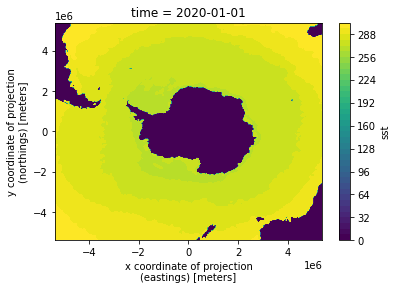

In [7]:
xr.plot.contourf(xr.open_dataset("data/era5/sh/tos/2020/2020_01_01.nc").isel(time=0).sst,
                 levels=50)

Against the sea ice for the same day is super intuitive to derive from the filesystem naming, by simply changing the respective dataset and variable.

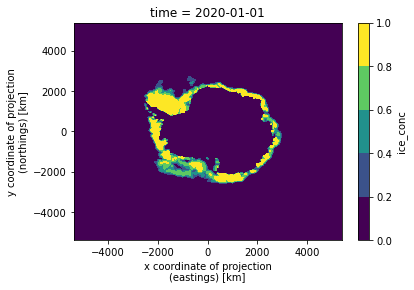

In [8]:
xr.plot.contourf(xr.open_dataset("data/osisaf/sh/siconca/2020/2020_01_01.nc").isel(time=0).ice_conc)

Similarly, switching to the normalised versions (change to `/processed/`) and/or checking other datasets and/or globbing for datasets that can be opened with [`xarray.open_mfdataset`](https://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html) is equally trivial thanks to this consistency.

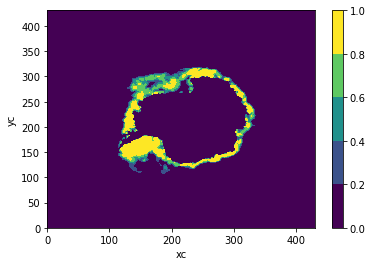

In [9]:
xr.plot.contourf(xr.DataArray(np.load("processed/notebook_data/osisaf/sh/siconca/2020_01_01.npy"),
                              dims=("yc", "xc")))

As we'll see later, extending the library to incorporate additional source data simply adds further entries to the `/data` directory, with the implementations ultimately following a consistent approach to storing the data to make more complex analysis trivial.

#### Dask example

For example, needing to inspect the maximum values for sea surface temperature across all 1990's and 2000's data using dask, xarray and glob

```
from dask.distributed import Client
dfs = glob.glob("data/era5/sh/tos/**/19*.nc") + glob.glob("data/era5/sh/tos/**/20*.nc")
client = Client()
ds = xr.open_mfdataset(dfs, combine="nested", concat_dim="time", parallel=True)
a = ds.groupby("time.year").max("time").max(("yc", "xc"))
m = a.compute()
for y in m.year.values:
    print("{} {:.2f}".format(y, float(m.sel(year=y))))
```

#### A note on individual files

The current use of daily files, though not desirable, was incurred to make it far easier to handle clarity for processing the data across multiple datasets and managing downloading of source data. Though this incurs an overhead for duplicated metadata in the source `/data/` folder, ultimately doesn't incur any problems versus the flexibility and clarity it affords. This __may__ be changed in the future.

## Process

There is a level of consistency (notwithstanding the masks and [this currently open issue for clarity](https://github.com/JimCircadian/icenet2/issues/3)) when looking at the processed files. The key here is that the data is normalised as appropriate via the use of processors defined in `icenet2.data.processors`. 

The associated normalisation/climatological parameters are then stored in an _identified_ processed data folder, with a corresponding `loader.name.json` configuration file which takes the form: 

In [10]:
!cat loader.notebook_data.json | jq 2>&1 | egrep -v '(19|20|npy)'

{
  "sources": {
    "era5": {
      "name": "notebook_data",
      "implementation": "IceNetERA5PreProcessor",
      "anom": [
        "tas",
        "ta500",
        "tos",
        "psl",
        "zg500",
        "zg250",
        "rsds",
        "rlds",
        "hus1000"
      ],
      "abs": [
        "uas",
        "vas"
      ],
      "dates": {
        "train": [
        ],
        "val": [
        ],
        "test": [
        ]
      },
      "linear_trends": [],
      "linear_trend_days": 7,
      "meta": [],
      "var_files": {
        "uas": [
        ],
        "vas": [
        ],
        "tas": [
        ],
        "ta500": [
        ],
        "tos": [
        ],
        "psl": [
        ],
        "zg500": [
        ],
        "zg250": [
        ],
        "rsds": [
        ],
        "rlds": [
        ],
        "hus1000": [
        ]
      }
    },
    "osisaf": {
      "name": "notebook_data",
      "implementation": "IceNetOSIPreProcessor",
      "anom": [],
      "a

This configuration tracks the various outputs from the normalisation process for each processor used, ensuring that no source data is normalised or modified and can thus be reused across different date ranges easily. At the same time, the caching of this data allows for two additional benefits aside from the obvious separation of preprocessing from data usage. Firstly, the prenormalisation allows uncached datasets to be used directly for predictions and training if desirable and, secondly, it allows multiple datasets to be derived from a single normalisation run which with larger datasets can take a reasonable amount of compute to achieve.

Finally, storing this in a machine and human readable format makes datasets relatively easy to inspect via the loader configuration when you forget what commands you preprocessed with!

__Note that the deeper elements of the configuration file aren't shown for brevity...__

### Producing preprocessed data videos

As with data sources, normalised data is easily visualized at the command line by running the `icenet_video_data` command. _In the case of the preprocessed data it is necessary to supply the `-sy` flag as the data is not stored in year directories at present_, as well as supply the `-n` to process NumPY files and the `-p` path to the directory under `/processed/`:

In [11]:
!icenet_video_data -n -sy -p processed/notebook_data era5,osisaf

2022-01-13 17:01:03.291227: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
INFO:root:Looking into processed/notebook_data
INFO:root:Looking at processed/notebook_data
INFO:root:Looking at processed/notebook_data/era5
INFO:root:Looking at processed/notebook_data/era5/sh
INFO:root:Looking at processed/notebook_data/era5/sh/normalisation.scale
INFO:root:Looking at processed/notebook_data/era5/sh/uas
INFO:root:Looking at processed/notebook_data/era5/sh/vas
INFO:root:Looking at processed/notebook_data/era5/sh/params
INFO:root:Looking at processed/notebook_data/era5/sh/tas
INFO:root:Looking at processed/notebook_data/era5/sh/ta500
INFO:root:Looking at processed/notebook_data/era5/sh/tos
INFO:root:Looking at processed/notebook_data/era5/sh/psl
INFO:root:Looking at processed/notebook_data/era5/sh/zg500
INFO:root:Looking at processed/notebook_data/era5/sh/zg250
INFO:root:Looking at processed/notebook_data/era5/sh/rsds
INFO:r

## Train

## Predict

## Random stuff

```python
from dask.distributed import Client
dfs = glob.glob("data/era5/sh/tos/**/19*.nc") + glob.glob("data/era5/sh/tos/**/20*.nc")
client = Client()
ds = xr.open_mfdataset(dfs, combine="nested", concat_dim="time", parallel=True)
a = ds.groupby("time.year").max("time").max(("yc", "xc"))
m = a.compute()
```
```bash
for DAME in $( find . -name '199*' -a -type f ); do NEWNAME=`echo "$DAME" | sed -r 's#(\/)(....\_)#\1max_\2#'`; echo mv $DAME $NEWNAME; done
```


## Plotting a forecast

TODO: convert

```python
from icenet2.plotting.video import xarray_to_video as xv
import xarray as xr
ds = xr.open_dataset("south_daily_forecast.nc")
fc = ds.sic_mean.isel(time=0).drop_vars("time").rename(dict(leadtime="time"))
fc['time'] = [dt.datetime(2022,1,3) + dt.timedelta(days=int(e)) for e in fc.time.values]
xv(fc, 15, "south_daily_forecast.mp4")
```


## Version
- Notebook:
- Codebase: